<a href="https://colab.research.google.com/github/MaInthiyaz/OasisInfobite_Data-analytics/blob/main/Cleaning_Data(AB_NYC_2019)p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Idea: Cleaning Data**


**Description:**

Data cleaning is the process of fixing or removing incorrect, corrupted, duplicate, or incomplete
data within a dataset. Messy data leads to unreliable outcomes. Cleaning data is an essential
part of data analysis, and demonstrating your data cleaning skills is key to landing a job. Here
are some projects to test out your data cleaning skills:
**Key Concepts and Challenges:**

**Data Integrity:** Ensuring the accuracy, consistency, and reliability of data throughout the
cleaning process.
**Missing Data Handling:** Dealing with missing values by either imputing them or making
informed decisions on how to handle gaps in the dataset.
**Duplicate Removal:** Identifying and eliminating duplicate records to maintain data
uniqueness.
**Standardization:** Consistent formatting and units across the dataset for accurate analysis.
**Outlier Detection**: Identifying and addressing outliers that may skew
analysis or model .   
performance.read the properly the zip file create a code as above given

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Load Dataset
data = pd.read_csv("AB_NYC_2019.csv")
print("Initial Data Shape:", data.shape)

Initial Data Shape: (48895, 16)


#step 2: Data Integrity Check

In [2]:
print("\nMissing Values:\n", data.isnull().sum())
print("\nData Types:\n", data.dtypes)


Missing Values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Data Types:
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude            

# Step 3: Handle Missing Data

In [3]:
 #Impute 'reviews_per_month' missing values with 0
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

# Drop rows where 'name' or 'host_name' are missing
data = data.dropna(subset=['name', 'host_name'])
print("\nData Shape After Handling Missing Values:", data.shape)


Data Shape After Handling Missing Values: (48858, 16)


 #Step 4: Remove Duplicates

In [4]:
# Drop duplicate rows
data = data.drop_duplicates()
print("\nData Shape After Duplicate Removal:", data.shape)


Data Shape After Duplicate Removal: (48858, 16)


# Step 5: Standardization

In [5]:
# Convert neighborhood group to uppercase for consistency
data['neighbourhood_group'] = data['neighbourhood_group'].str.upper()

# Step 6: Outlier Detection & Handling

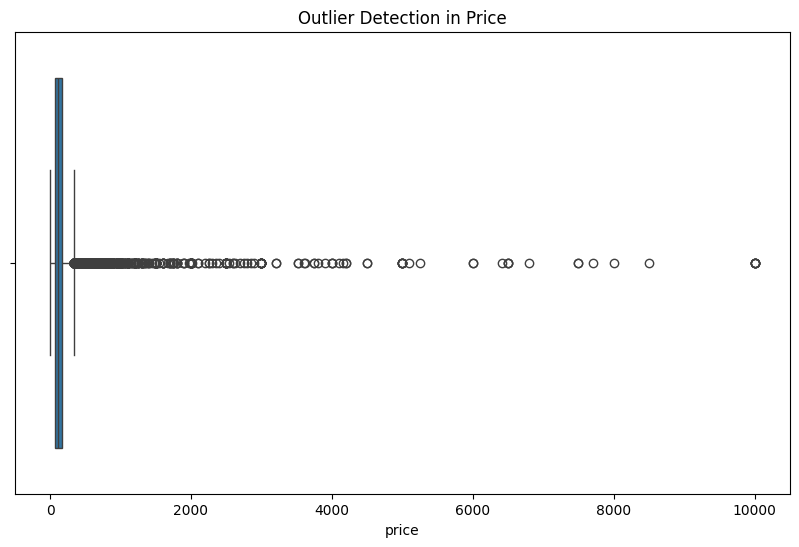


Data Shape After Outlier Removal: (48384, 16)


In [6]:
 #Visualize outliers in price
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Outlier Detection in Price')
plt.show()

# Remove listings with extremely high prices (above 99th percentile)
q99 = data['price'].quantile(0.99)
data = data[data['price'] <= q99]
print("\nData Shape After Outlier Removal:", data.shape)

# Step 7: Save Cleaned Data

In [7]:
cleaned_path = "cleaned_AB_NYC_2019.csv"
data.to_csv(cleaned_path, index=False)
print(f"\nCleaned data saved to {cleaned_path}")


Cleaned data saved to cleaned_AB_NYC_2019.csv
